## Muntlig redovisning

Genomfördes 2025-01-03

## Teoretiska frågor

1. Beskriv hur en relationsdatabas fungerar

I en relationsdatabas så används tabeller med rader och kolumner för att skapa struktur för datan. För att koppla samlan olika tabeller definerar man nycklar (Primary och Foreign) som kan användas som länkar mellan tabellerna. 
Ofta representerar en tabell ett koncept, i en industri skulle tex en tabell kunna användas för att beskriva deras samling maskiner. Varje rad (ett "record") skulle då representera en maskin, och kolumnerna används för att lista olika egenskaper maskinerna har (tex ID-nummer, vad maskinen producerar, vem som ansvarar för den, var den står mm). Personen som ansvarar för maskinen kanske också står med i en tabell över de anställda, genom användning av nycklar kan då dessa tabeller kopplas ihop. 

2. Vad menas med CRUD-flödet

CRUD är en akronym för de fyra typer av operationer som används när man hanterar data.
Create - skapa data
Read - läs data
Update - Uppdatera data
Delete - Ta bort data


3. Beskriv kort vad en "left join" och en "inner join" är. Varför använder man det?

Left join och inner join är olika varianter av "join" vilket vi använder oss av när vi vill komma åt data från olika tabeller i en databas.
En join tar och kombinerar rader från de olika tabeller utifrån gemensamma kolumner. 
En inner join tar de rader som innehåller matchande värden i båda tabellerna, 
en left join tar alla värden från den vänstra tabellen och de som matchar från "den högra"

Om vi tänker oss två tabeller: A (left) och B (right) och mängdlära:
left join: A + (A snitt B)
inner join: A snitt B

Det finns även tex full join och right join. 


4. Beskriv kort vad en indexering i SQL innebär

Indexering används för att underlätta sökande i tabeller, det kan hjälpa oss att begränsa sökandet så att inte alla rader behöver kollas igenom efter rätt information.  
När vi anger primärnyckel för en tabell så fungerar den direkt som ett index, även andra typer finns (tex uniqe index och clustred index). 

Exempel: i en tabell med personnummer (ååmmdd-xxxx) som primärnyckel så kan vi snabbt begränsa sökande till tex personer födda vissa år. 

Om vinsten med indexering är ökad hastighet vid sökningar så är nackdelen att det tar längre tid att uppdatera/skapa data till tabellen då alla index behöver uppdateras. 

5. Beskriv kort vad en vy i SQL är

En vy fungerar som en tabell med data som användaren kan arbeta med, men arbetet i vyn är begränsat till det som läggs i den vid tillfället den skapades. Användaren kan inte komma åt någon ytterligare data, och om något ändras i vyn så påverkas inte ursprungstabellerna som vyn skapades från. 

6. Beskriv kort vad en lagrad procedur i SQL är

En lagrad procedur i SQL är en egenskriven funktion/kod som sparats i databasen. Anledningar till att implementera lagrade procedurer:  
Ökad säkerhet (ger användare möjlighet att genomföra operationer på data dom inte har tillgång till (utan att ha möjlighet att ändra/läsa datan)
Mindre jobb (ett sätt att återanvända kod)
Minskad nätverkstrafik (endast anropet på procedurn skickas, inte koden för proceduren)



### Importering av bibliotekt och kod för att förbereda SQL-alchemy.

In [405]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, URL, inspect
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
SERVER = 'localhost'  
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)

In [407]:
connection = engine.connect()
inspector = inspect(engine)

### Querys och skapande av dataframes

In [408]:
# Overviews for NA and EU data. 
na_overview = pd.read_sql(sql="""
SELECT 
	C.Name
	,A.Color
	,SUM(B.OrderQTY) AS AmountSold
FROM Production.Product AS A
LEFT JOIN Sales.SalesOrderDetail AS B
	ON A.ProductID = B.ProductID
LEFT JOIN Production.ProductSubCategory AS C
	ON A.ProductSubcategoryID = C.ProductSubCategoryID
LEFT JOIN Sales.SalesOrderHeader AS D
	ON B.SalesOrderID = D.SalesOrderID
LEFT JOIN Sales.SalesTerritory AS E
	ON D.TerritoryID = E.TerritoryID
WHERE (A.ProductSubCategoryID IS NOT NULL) AND (A.ProductSubCategoryID < 4) AND (D.TerritoryID <7)
GROUP BY
	A.Color
	,C.Name
ORDER BY Color, C.Name
""", con=connection) 

eu_overview = pd.read_sql(sql="""
SELECT 
	C.Name
	,A.Color
	,SUM(B.OrderQTY) AS AmountSold
FROM Production.Product AS A
LEFT JOIN Sales.SalesOrderDetail AS B
	ON A.ProductID = B.ProductID
LEFT JOIN Production.ProductSubCategory AS C
	ON A.ProductSubcategoryID = C.ProductSubCategoryID
LEFT JOIN Sales.SalesOrderHeader AS D
	ON B.SalesOrderID = D.SalesOrderID
LEFT JOIN Sales.SalesTerritory AS E
	ON D.TerritoryID = E.TerritoryID
WHERE (A.ProductSubCategoryID IS NOT NULL) AND (A.ProductSubCategoryID < 4) AND (D.TerritoryID = 7 OR D.TerritoryID = 8 OR D.TerritoryID = 10)
GROUP BY
	A.Color
	,C.Name
ORDER BY Color, C.Name;
""", con=connection)



### Querys för dataframes över försäljning över olika år (kollar Juni --> Juni, mellan 2012 och 2014)

In [409]:
#2011 - 2012
sold_2011_2012 = pd.read_sql(sql="""
SELECT 
	SUM(B.LineTotal) AS Amount
	, E.Name
FROM Sales.SalesOrderHeader AS A
INNER JOIN Sales.SalesOrderDetail AS B
	ON A.SalesOrderID = B.SalesOrderID
LEFT JOIN Production.Product AS C
	ON C.ProductID = B.ProductID
LEFT JOIN Production.ProductSubcategory AS D
	ON C.ProductSubcategoryID = D.ProductSubcategoryID
LEFT JOIN Production.ProductCategory AS E
	ON D.ProductCategoryID = E.ProductCategoryID
WHERE OrderDate > '2011-05-31' AND OrderDate < '2012-05-31'

GROUP BY E.Name
ORDER BY Amount DESC
""", con=connection)


In [410]:
#2012 - 2013
sold_2012_2013 = pd.read_sql(sql="""
SELECT 
	SUM(B.LineTotal) AS Amount
	, E.Name
FROM Sales.SalesOrderHeader AS A
INNER JOIN Sales.SalesOrderDetail AS B
	ON A.SalesOrderID = B.SalesOrderID
LEFT JOIN Production.Product AS C
	ON C.ProductID = B.ProductID
LEFT JOIN Production.ProductSubcategory AS D
	ON C.ProductSubcategoryID = D.ProductSubcategoryID
LEFT JOIN Production.ProductCategory AS E
	ON D.ProductCategoryID = E.ProductCategoryID
WHERE OrderDate > '2012-05-31' AND OrderDate < '2013-05-31'

GROUP BY E.Name
ORDER BY Amount DESC
""", con=connection)

In [411]:
#2013 -2014
sold_2013_2014 = pd.read_sql(sql="""
SELECT 
	SUM(B.LineTotal) AS Amount
	, E.Name
FROM Sales.SalesOrderHeader AS A
INNER JOIN Sales.SalesOrderDetail AS B
	ON A.SalesOrderID = B.SalesOrderID
LEFT JOIN Production.Product AS C
	ON C.ProductID = B.ProductID
LEFT JOIN Production.ProductSubcategory AS D
	ON C.ProductSubcategoryID = D.ProductSubcategoryID
LEFT JOIN Production.ProductCategory AS E
	ON D.ProductCategoryID = E.ProductCategoryID
WHERE OrderDate > '2013-05-31' AND OrderDate < '2014-05-31'

GROUP BY E.Name
ORDER BY Amount DESC
""", con=connection)

### Querys för dataframes över anställda och regioner som företaget är verksamt i.

In [412]:
# Employees
employees = pd.read_sql(sql="""
SELECT
	C.DepartmentID
	,C.Name
	,COUNT(C.Name) AS Employes
	
FROM
	HumanResources.Employee AS A
	INNER JOIN HumanResources.EmployeeDepartmentHistory AS B
		ON A.BusinessEntityID = B.BusinessEntityID
	LEFT JOIN HumanResources.Department AS C
		ON B.DepartmentID = C.DepartmentID

GROUP BY C.Name, C.DepartmentID, C.Name
ORDER BY C.DepartmentID
""", con=connection)

In [413]:
# Territory groups
territory_groups = pd.read_sql(sql="""
                               
SELECT 
	[Name]
	,CountryRegionCode
	,[Group]

FROM Sales.SalesTerritory                               
                               
""", con=connection)

### Arbete med kod

In [414]:
# Creating lists for the colors and types of bikes.

colors = (eu_overview.iloc[:,1]).unique()
types = (eu_overview.iloc[:,0]).unique()

In [415]:
#Creating lists for the number of bikes sold in EU / NA

sold_in_na = na_overview['AmountSold'].sum(axis=0)
sold_in_eu = eu_overview['AmountSold'].sum(axis=0)

#Creating dataframe for how the bikes sold in each region differs by color
sold_by_color_na = na_overview.groupby(['Color']).sum('AmountSold')
sold_by_color_eu = eu_overview.groupby(['Color']).sum('AmountSold')

#Adding fraction and region columns to dataframe
sold_by_color_eu['Fraction'] = sold_by_color_eu['AmountSold'] / sold_in_eu
sold_by_color_eu['Region'] = 'EU'
sold_by_color_na['Fraction'] = sold_by_color_na['AmountSold'] / sold_in_na
sold_by_color_na['Region'] = 'NA'

#Creating dataframe for how the bikes sold in each region differs by type
sold_by_type_na = na_overview.groupby(['Name']).sum('AmountSold')
sold_by_type_eu = eu_overview.groupby(['Name']).sum('AmountSold')

#Adding fraction and region columns to dataframe
sold_by_type_eu['Fraction'] = sold_by_type_eu['AmountSold'] / sold_in_eu
sold_by_type_eu['Region'] = 'EU'
sold_by_type_na['Fraction'] = sold_by_type_na['AmountSold'] / sold_in_na
sold_by_type_na['Region'] = 'NA'


In [416]:
#Creating variables for region/color information, used for statistical calculations when comparing colors sold between regions. 
eu_black = sold_by_color_eu.at['Black', 'AmountSold']
eu_blue = sold_by_color_eu.at['Blue', 'AmountSold']
eu_red = sold_by_color_eu.at['Red', 'AmountSold']
eu_silver = sold_by_color_eu.at['Silver', 'AmountSold']
eu_yellow = sold_by_color_eu.at['Yellow', 'AmountSold']

na_black = sold_by_color_na.at['Black', 'AmountSold']
na_blue = sold_by_color_na.at['Blue', 'AmountSold']
na_red = sold_by_color_na.at['Red', 'AmountSold']
na_silver = sold_by_color_na.at['Silver', 'AmountSold']
na_yellow = sold_by_color_na.at['Yellow', 'AmountSold']

In [417]:
#Creating variables for region/type information, used for statistical calculations when comparing types sold between regions. 

na_touring = sold_by_type_na.at['Touring Bikes','AmountSold']
na_road = sold_by_type_na.at['Road Bikes','AmountSold']
na_mountain_bike = sold_by_type_na.at['Mountain Bikes','AmountSold']

eu_touring =sold_by_type_eu.at['Touring Bikes','AmountSold']
eu_road = sold_by_type_eu.at['Road Bikes','AmountSold']
eu_mountain_bike = sold_by_type_eu.at['Mountain Bikes','AmountSold']

In [418]:
sold_by_color_eu = sold_by_color_eu.reset_index()
sold_by_color_na = sold_by_color_na.reset_index()

sold_by_type_eu = sold_by_type_eu.reset_index()
sold_by_type_na = sold_by_type_na.reset_index()

In [419]:
# Creating a function for calculating confidence intervals when comparing proportions from two diffrent samples. 
# Takes 4 inputs, num2 and num4 are the diffrent sample sizes, num1 and num3 are the part of the proporiton. 
# Returns a float representing how far from the diffrence between the proportions the interval stretches. 

def calc_stat(num1: int, num2: int, num3: int, num4: int):
    p_1 = num1 / num2
    p_2 = num3 / num4
    
    first_limit = (p_1 - p_2) + 1.96 * ((p_2*(1-p_2)/num4) + (p_1*(1-p_1)/num2) )**0.5
    
    second_limit = (p_1 - p_2) - 1.96 * ((p_2*(1-p_2)/num4) + (p_1*(1-p_1)/num2) )**0.5

    error_bar_value = (1.96 * ((p_2*(1-p_2)/num4) + (p_1*(1-p_1)/num2) )**0.5)
    return (error_bar_value)

In [420]:
#Calculating confidence intervals using the formula above for colors.
result_black_bike = calc_stat(eu_black, sold_in_eu, na_black, sold_in_na)
result_blue_bike = calc_stat(eu_blue, sold_in_eu, na_blue, sold_in_na)
result_red_bike = calc_stat(eu_red, sold_in_eu, na_red, sold_in_na)
result_silver_bike = calc_stat(eu_silver, sold_in_eu, na_silver, sold_in_na)
result_yellow_bike = calc_stat(eu_yellow, sold_in_eu, na_yellow, sold_in_na)

#Putting all the results in a list
color_errors = [result_black_bike, result_blue_bike, result_red_bike, result_silver_bike, result_yellow_bike]


In [421]:
#Calculating confidence intervals using the formula above for types of bike.
result_mountain_bike = calc_stat(eu_mountain_bike, sold_in_eu, na_mountain_bike, sold_in_na)
result_touring_bike = calc_stat(eu_touring, sold_in_eu, na_touring, sold_in_na)
result_road_bike = calc_stat(eu_road, sold_in_eu, na_road, sold_in_na)

type_errors = [result_mountain_bike, result_touring_bike, result_road_bike]

In [422]:
#Creating a dataframes for comparing color percentages between EU/NA

temp_frames = [sold_by_color_eu, sold_by_color_na]
comparission_color_eu_na = pd.concat(temp_frames)
comparission_color_eu_na.reset_index()

diffrence_fractions_colors = sold_by_color_eu[['Color']]
eu_fractions = pd.Series(sold_by_color_eu['Fraction'])
na_fractions = pd.Series(sold_by_color_na['Fraction'])

results_diffrence_fractions_colors = diffrence_fractions_colors.join(eu_fractions)
results_diffrence_fractions_colors = results_diffrence_fractions_colors.rename(columns={'Fraction': 'eu_Fractions'})
results_diffrence_fractions_colors['na_Fractions'] = na_fractions
results_diffrence_fractions_colors['Diffrence'] = results_diffrence_fractions_colors['eu_Fractions'] - results_diffrence_fractions_colors['na_Fractions']

sold_by_type_eu

,Name,AmountSold,Fraction,Region
0,Mountain Bikes,4126,0.271662,EU
1,Road Bikes,6369,0.419344,EU
2,Touring Bikes,4693,0.308994,EU


In [423]:
temp_frames = [sold_by_type_eu, sold_by_type_na]
comparission_type_eu_na = pd.concat(temp_frames)
comparission_type_eu_na.reset_index()

diffrence_fractions_types = sold_by_type_eu[['Name']]
eu_fractions = pd.Series(sold_by_type_eu['Fraction'])
na_fractions = pd.Series(sold_by_type_na['Fraction'])

results_diffrence_fractions_types = diffrence_fractions_types.join(eu_fractions)
results_diffrence_fractions_types = results_diffrence_fractions_types.rename(columns={'Fraction': 'eu_Fractions'})
results_diffrence_fractions_types['na_Fractions'] = na_fractions
results_diffrence_fractions_types['Diffrence'] = results_diffrence_fractions_types['eu_Fractions'] - results_diffrence_fractions_types['na_Fractions']

### AdventureWorks 2022

Databasen AdventureWorks2022 är en databas för företaget AdventureWorks som hjälper dom med hanteringen av produkter, kunder, ordrar, anställda med mera. 
De större schema-kategorierna i databasen är Sales och Production, utöver dessa finns också HumanResources, Person och Purchasing som schemas. 

Företaget har 290 anställda och majoriteten av sin verksamhet i Nordamerika, men är också närvarande i Europa och Australien. Majoriteten av de anställda arbetar inom produktion.

AdventureWorks säljer huvudsakligen cyklar (i tre kategorier, Road, Touring, Mountain Bike) men också cykeldelar, kläder och assocearer. Över tid kan vi se att de övriga kategorierna tagit ikapp cyklar gällande försäljningstotal (i $, inte antal).

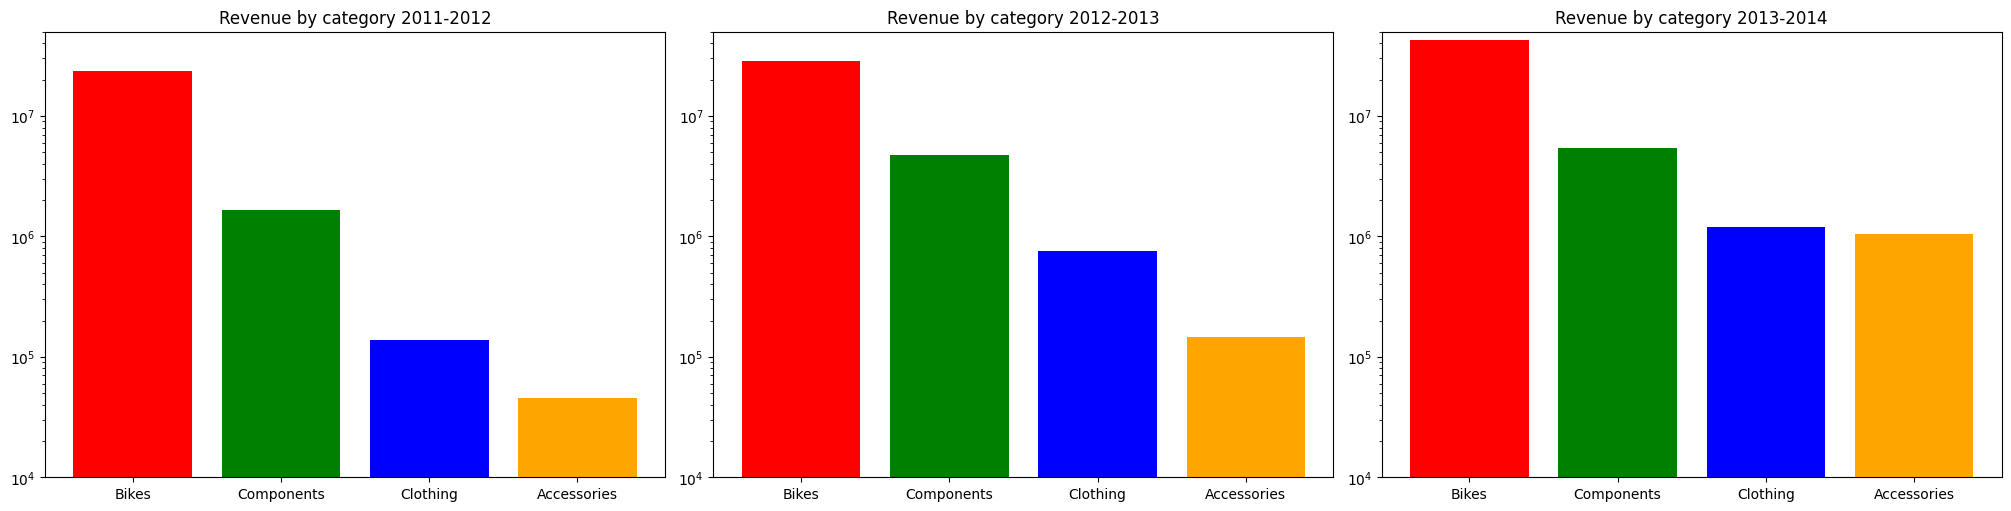

In [424]:
fig = plt.figure(layout ='constrained', figsize = (20, 5))


ax1 = fig.add_subplot(1,3,1)
plt.yscale("log")
ax1.bar(sold_2011_2012['Name'], sold_2011_2012['Amount'], color=('red', 'green', 'blue', 'orange'))
ax1.set_title('Revenue by category 2011-2012')
ax1.set_ylim(1*(10**4), 5*(10**7))

ax2 = fig.add_subplot(1,3,2)
plt.yscale("log")
ax2.bar(sold_2012_2013['Name'], sold_2012_2013['Amount'], color=('red', 'green', 'blue', 'orange'))
ax2.set_title('Revenue by category 2012-2013')
ax2.set_ylim(1*(10**4), 5*(10**7))


ax3 = fig.add_subplot(1,3,3)
plt.yscale("log")
ax3.bar(sold_2013_2014['Name'], sold_2013_2014['Amount'], color=('red', 'green', 'blue', 'orange'))
ax3.set_title('Revenue by category 2013-2014')
ax3.set_ylim(1*(10**4), 5*(10**7))

plt.show()


In [448]:
sales_2011_2014 = sold_2011_2012
sales_2011_2014 = sales_2011_2014.merge(sold_2012_2013, how='left', on='Name', suffixes=('_2011-2012', '_2012-2013'))
sales_2011_2014 = sales_2011_2014.merge(sold_2013_2014, how='left', on='Name')
sales_2011_2014 = sales_2011_2014.rename(columns={'Amount': 'Amount_2013-2014'})
sales_2011_2014 = sales_2011_2014.set_index(['Name'])
sales_2011_2014

,Amount_2011-2012,Amount_2012-2013,Amount_2013-2014
Name,,,
Bikes,2.343933e+07,2.830726e+07,4.240839e+07
Components,1.643352e+06,4.750333e+06,5.377382e+06
Clothing,1.366241e+05,7.597573e+05,1.204044e+06
Accessories,4.559679e+04,1.456130e+05,1.044997e+06


In [428]:
employees

,DepartmentID,Name,Employes
0,1,Engineering,7
1,2,Tool Design,4
2,3,Sales,18
3,4,Marketing,10
4,5,Purchasing,13
5,6,Research and Development,4
6,7,Production,180
7,8,Production Control,6
8,9,Human Resources,6
9,10,Finance,11


In [429]:
territory_groups

,Name,CountryRegionCode,Group
0,Northwest,US,North America
1,Northeast,US,North America
2,Central,US,North America
3,Southwest,US,North America
4,Southeast,US,North America
5,Canada,CA,North America
6,France,FR,Europe
7,Germany,DE,Europe
8,Australia,AU,Pacific
9,United Kingdom,GB,Europe


### Statistisk jämförelse mellan Nordamerika och Europa

Jag har kollat närmre på försäljningen av cyklar från AdventureWorks och hur den skiljer sig mellan Nordarmerika och Europa. 
Först presenteras ett antal dataframes som visar hur försäljningen sett ut i Nordamerika (NA) och Europa (EU) var för sig. 
Sedan kommer ett antal diagram där regionerna jämförs. Då regionerna har skiljer sig markant i hur mycket som sålts så kommer de flesta diagrammen kolla på andelar istället för antal. 

De statistiska jämförelserna so gjordes kollade på om färg på cykeloch typ av cykel skiljer sig mellan regionerna. Jämförelserna beräknas som skillnaden i andelar mellan två olika prover, med ett 95%-konfidensintervall (z=1.96). I de senare diagrammen visas error-bars för att synliggöra att det fanns statistiskt signifikanta skillnader. 


#### Dataframes

In [430]:
print('Försäljning i Nordamerika')
na_overview


Försäljning i Nordamerika


,Name,Color,AmountSold
0,Mountain Bikes,Black,12285
1,Road Bikes,Black,13807
2,Touring Bikes,Blue,4698
3,Road Bikes,Red,15431
4,Mountain Bikes,Silver,10480
5,Road Bikes,Yellow,8984
6,Touring Bikes,Yellow,3367


In [431]:
print('\nFörsäljning i Europa')
eu_overview


Försäljning i Europa


,Name,Color,AmountSold
0,Mountain Bikes,Black,2079
1,Road Bikes,Black,2538
2,Touring Bikes,Blue,2635
3,Road Bikes,Red,1714
4,Mountain Bikes,Silver,2047
5,Road Bikes,Yellow,2117
6,Touring Bikes,Yellow,2058


#### Diagram över försäljningen i regionerna

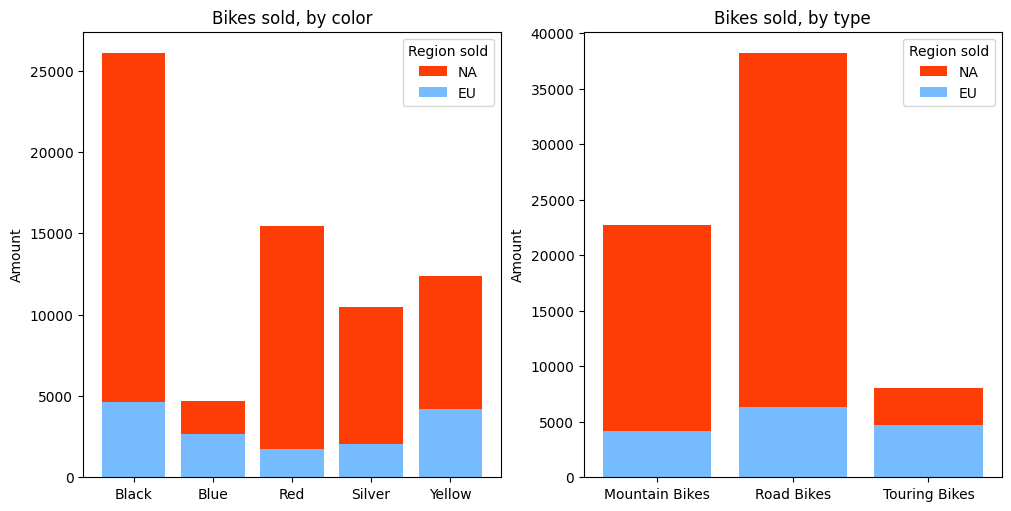

In [432]:
fig = plt.figure(layout ='constrained', figsize = (10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(colors, sold_by_color_na['AmountSold'], label = 'NA', color = '#fd3c06')
ax1.bar(colors, sold_by_color_eu['AmountSold'], label = 'EU', color = '#75bbfd')

ax1.set_ylabel('Amount')
ax1.legend(title='Region sold')
ax1.set_title('Bikes sold, by color')

ax2.bar(types, sold_by_type_na['AmountSold'], label = 'NA', color = '#fd3c06')
ax2.bar(types, sold_by_type_eu['AmountSold'], label = 'EU', color = '#75bbfd')

ax2.set_ylabel('Amount')
ax2.legend(title='Region sold')
ax2.set_title('Bikes sold, by type')

plt.show()

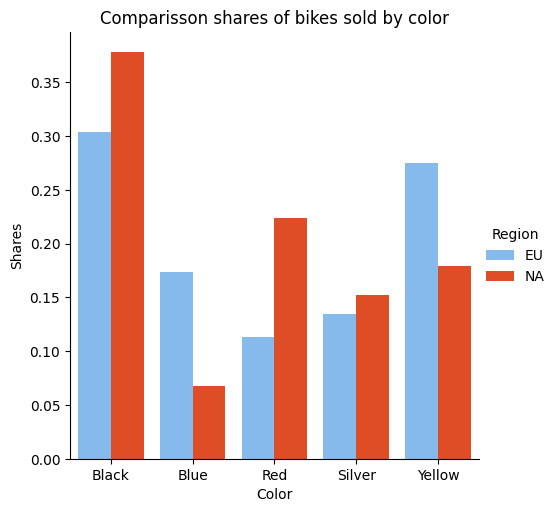

In [433]:
ax = sns.catplot(data = comparission_color_eu_na, x = 'Color', y = 'Fraction', hue = 'Region', kind = 'bar', palette=['#75bbfd', '#fd3c06'])
ax.set_ylabels('Shares')
ax.set(title='Comparisson shares of bikes sold by color')
plt.show()

#### Diagram med jämförelse mellan andelar sålda i NA/EU

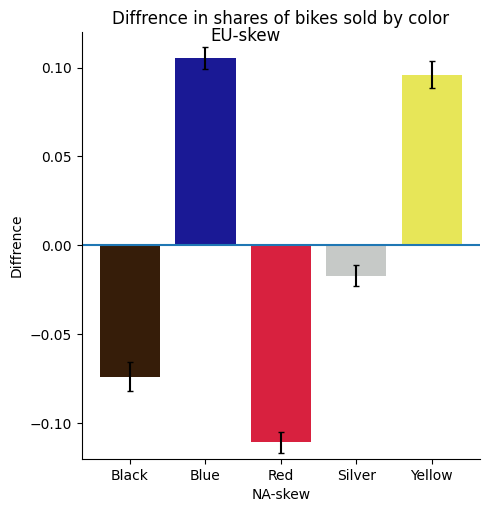

In [434]:
palette_colors = ['#3d1c02', '#0504aa', '#f7022a', '#c5c9c7', '#fffe40']
ax = sns.catplot(data = results_diffrence_fractions_colors, x = 'Color', y = 'Diffrence', hue = 'Color', kind = 'bar', palette=palette_colors, legend=False)
ax.set(title='Diffrence in shares of bikes sold by color')
ax.fig.suptitle('EU-skew')
ax.set_axis_labels('NA-skew')
plt.axhline(y=0, linestyle='-')
plt.errorbar(x = results_diffrence_fractions_colors['Color'], y = results_diffrence_fractions_colors['Diffrence'],
            yerr=list(color_errors), fmt='none', c= 'black', capsize = 2)
plt.ylim(-0.12, 0.12)
plt.show()

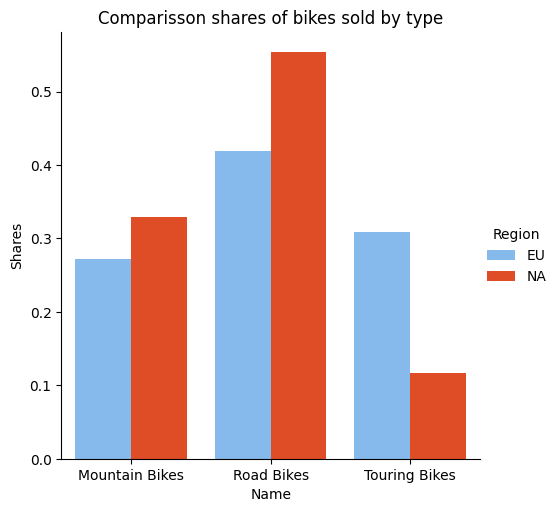

In [435]:
ax = sns.catplot(data = comparission_type_eu_na, x = 'Name', y = 'Fraction', hue = 'Region', kind = 'bar', palette=['#75bbfd', '#fd3c06'])
ax.set_ylabels('Shares')
ax.set(title='Comparisson shares of bikes sold by type')
plt.show()

(-0.22, 0.22)

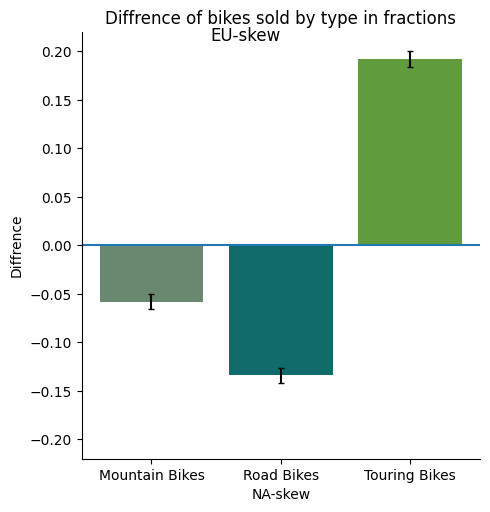

In [436]:
palette_types = ['#658d6d', '#017a79', '#5cac2d']
ax = sns.catplot(data = results_diffrence_fractions_types, x = 'Name', y = 'Diffrence', hue = 'Name', kind = 'bar', palette=palette_types, legend=False)
ax.set(title='Diffrence of bikes sold by type in fractions')
ax.fig.suptitle('EU-skew')
ax.set_axis_labels('NA-skew')
plt.axhline(y=0, linestyle='-')
plt.errorbar(x = results_diffrence_fractions_types['Name'], y = results_diffrence_fractions_types['Diffrence'],
            yerr=list(type_errors), fmt='none', c= 'black', capsize = 2)
plt.ylim(-0.22, 0.22)

### Analys

Både när vi kollar på färg och typ av cykel kan vi se att det finns statistiskt säkerställda skillnader mellan regionerna (om error-bar täcker nollan indikerar det att resultatet kan bero på slumpen). I EU ser vi en preferens för gula och blåa cyklar när vi kollar färg och Touring-bikes för typ av cykel. 

Kollar vi på vilka kombinationer som finns mellan typer av cyklar och deras färger ser vi att Touring-bikes säljs i två färger: blå och gul. Med detta i bakhuvudet bör vi därför ställa oss mer tveksamma till färgpreferensen i EU. Vid ett köp av cykel bör typ av cykel vara det köparen bestämmer sig för först, och färg i efterhand. Det kan därför vara så att den statistiska skillnaden vi ser kring färger egentligen är ett resultat av hur populär touring-bikes är i EU. Detta gäller främst färgen blå, som endast är representerad bland touring-bikes. 

Om vi kollar närmre på road-bikes (som är mer populära i NA) så kommer dessa i tre färger: svart, röd och gul. Även om vi inte kan dra några större slutsatser kan vi ändå observera att det i EU säljs en högre andel gula än röda road-cyklar (men populärast är svart), medan det i NA är populärast med röd och minst populärt med gult. Detta skulle stärka påståendet att gul är mer populärt i EU (inte inte bara är ett resultat från Touring-bikes). 

Om AdventureWorks börjar expandera på den europeiska marknaden bör de vara uppmärksamma på skillnaden i vad som säljs (lyft fram Touring-bikes, se till att dessa är tillgängliga).
Om AdventureWorks i teorin bestämmer sig för att utöka/ändra sortimentet för att bättre matcha en EU-marknad så kan ett större utbud av färger bland Touring-bikes vara rätt väg att gå, men även att introducera gula mountain-bikes (då vi med större säkerhet kan bedömma den som populär än färgen blå). 

#### Executive summary

Även om den med marginal fortfarande är störst så tappar försäljningskategorin "cyklar" andelar jämfört med de andra kategorierna (Det säljs fortfarande ca10 gånger mer cyklar än komponenter som är näst största kategorin)

Det finns skillnader mellan den nordamerikanska och europeiska marknaden, både gällande cykel-typer och färger. Jämför vi regionerna är det i europa mer populärt med färgen gul och cykeltypen touring-bikes, medan det i nordamerika är road-bikes och färgen röd som gäller. 

### Självvärdering

#### Utmaningar
Under kursens gång så har det tyvärr funnits många yttre omständigheter som gjort det svårt att arbeta så mycket som jag önskat med materialet. Av det jag gjort så skulle jag säga att största utmaningen var att få ordning på diagram och tabeller, det är något jag får träna mer på framöver.

#### Betyg
Jag tycker att jag gjort djupare analyser av den datan ja kollat på och därför närför når betyget VG. 

#### Tips
Det finns många bra verktyg för att få hjälp, bli bättre på att använda dom! Behöver också bli bättre på att ge namn till saker i min kod, det blev rörigt mot slutet. 